Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/40
48/48 [==============================] - 4s 32ms/step - loss: 0.7198 - accuracy: 0.5052 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 2/40
48/48 [==============================] - 1s 28ms/step - loss: 0.6482 - accuracy: 0.6719 - val_loss: 0.5540 - val_accuracy: 0.7000
Epoch 3/40
48/48 [==============================] - 2s 43ms/step - loss: 0.6104 - accuracy: 0.6823 - val_loss: 0.5517 - val_accuracy: 0.7500
Epoch 4/40
48/48 [==============================] - 2s 33ms/step - loss: 0.5391 - accuracy: 0.7240 - val_loss: 0.5657 - val_accuracy: 0.7500
Epoch 5/40
48/48 [==============================] - 1s 28ms/step - loss: 0.6432 - accuracy: 0.7031 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 6/40
48/48 [==============================] - 1s 28ms/step - loss: 0.6940 - acc

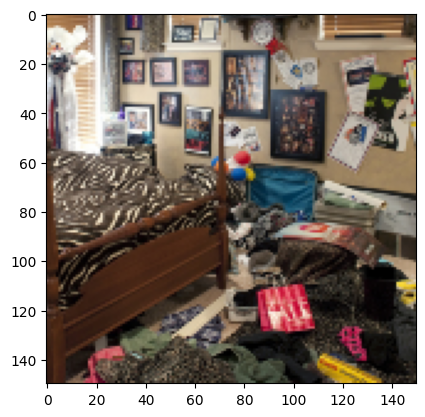

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
gpu_device = tf.config.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu_device, True)

with tf.device('/GPU:0'):
  path = '/content/drive/MyDrive/'
  train_dir = os.path.join(path, 'train')
  validation_dir = os.path.join(path, 'val')
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      fill_mode = 'nearest')

  test_datagen = ImageDataGenerator(
                      rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
              train_dir,
              target_size=(150, 150),
              batch_size=4,
              class_mode='binary')

  validation_generator = test_datagen.flow_from_directory(
              validation_dir,
              target_size=(150, 150),
              batch_size=4,
              class_mode='binary')

  model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
      ])

  model.compile(loss='binary_crossentropy',
                optimizer=tf.optimizers.Adam(),
                metrics=['accuracy'])
  model.fit(
        train_generator,
        epochs=40,
        validation_data=validation_generator,
        )
  for x in range(9):

    img = image.load_img(path + 'test/' + str(x) + '.png', target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)


    if classes == 0:
      print('clean')
    else:
      print('messy')

